# Computational Drug Discovery

Projeto criado com base no tutorial disponibilizado no repositório:
https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_1_bioactivity_data.ipynb

Objetivo: Seleção, pré-processamento e análise exploratória de dados disponibilizados na base de dados ChEMBL para construção de um modelo de machine learning.

- https://www.ebi.ac.uk/chembl/

## Preparação do ambiente

Instalar a biblioteca necessária para acessar os dados de interesse:

In [ ]:
!pip install chembl_webresource_client

Importar as bibliotecas necessárias:

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Procura da proteína-alvo

In [3]:
# Busca de alvos para coronavírus
target = new_client.target
target_query = target.search('coronavirus')
targets_1 = pd.DataFrame.from_dict(target_query)
targets_1

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


Outro exemplo:

In [4]:
# Busca de alvos para dengue
target = new_client.target
target_query = target.search('dengue')
targets_2 = pd.DataFrame.from_dict(target_query)
targets_2

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,15.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,13.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,13.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,13.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,11.0,False,CHEMBL613728,[],ORGANISM,11070
5,"[{'xref_id': 'P29990', 'xref_name': None, 'xre...",Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,9.0,False,CHEMBL5980,"[{'accession': 'P29990', 'component_descriptio...",SINGLE PROTEIN,31634


## Seleção dos dados de bioatividade

### Exemplo 1: SARS coronavirus 3C-like proteinase

In [5]:
selected_target_1 = targets_1.target_chembl_id[4]
selected_target_1

'CHEMBL3927'

Seguindo as sugestões do tutorial modelo, vamos selecionar dados que estão reportados como valores IC50 na unidade nM (nanomolar):

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target_1).filter(standard_type="IC50")

In [7]:
df_coronavirus = pd.DataFrame.from_dict(res)
df_coronavirus.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [8]:
# Verificar
df_coronavirus.standard_type.unique()

array(['IC50'], dtype=object)

In [9]:
# Salvar os resultados em um arquivo do tipo csv
df_coronavirus.to_csv('bioactivity_data_coronavirus.csv', index=False)

In [10]:
# Visualizar o arquivo criado
! head bioactivity_data_coronavirus.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei': '5.90'}",CH

### Exemplo 2: Dengue virus type 2 NS3 protein

In [5]:
selected_target_2 = targets_2.target_chembl_id[5]
selected_target_2

'CHEMBL5980'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target_2).filter(standard_type="IC50")

In [7]:
df_dengue = pd.DataFrame.from_dict(res)
df_dengue.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0


In [8]:
df_dengue.standard_type.unique()

array(['IC50'], dtype=object)

In [15]:
df_dengue.to_csv('bioactivity_data_dengue.csv', index=False)

In [9]:
! head bioactivity_data_dengue.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
active,7018430,[],CHEMBL1794550,"PUBCHEM_BIOASSAY: Primary and Confirmatory Screening for Flavivirus Genomic Capping Enzyme Inhibition. (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID588708, AID588742]",F,,,BAO_0000190,BAO_0000019,assay format,COc1ccc2nc3cccc(OC)c3nc2c1,,,CHEMBL1201862,,,,C

## Lidando com dados faltantes

In [17]:
df_coronavirus.shape

(133, 45)

In [18]:
df_coronavirus_2 = df_coronavirus[df_coronavirus.standard_value.notna()]
df_coronavirus_2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [10]:
df_dengue.shape

(1230, 45)

In [11]:
df_dengue_2 = df_dengue[df_dengue.standard_value.notna()]
df_dengue_2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,None,24395840,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,9.0
1226,None,24395841,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,12.0
1227,None,24395842,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,6.0
1228,None,24395843,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,74.0


Obs: No caso da presença de valores faltantes como no Exemplo 2, será utilizado a tabela 2 (df_dengue_2), excluindo esses valores.

## Pré-processamento dos dados de bioatividade

### Exemplo 1

Rotulando compostos como sendo ativos, inativos ou intermediários de acordo com a sugestão do tutorial modelo:

- A divisão foi feita levando em consideração a coluna 'standard_value';

- Valores iguais ou menores que 1000 nM serão considerados ativos, valores iguais ou maiores que 10000 nM serão considerados inativos e valores entre 1000 a 10000 nM serão considerados intermediários.

In [33]:
bioactivity_class = [] # criar uma variavel vazia
for i in df_coronavirus_2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [22]:
mol_cid = []
for i in df_coronavirus_2.molecule_chembl_id:
  mol_cid.append(i)

In [23]:
canonical_smiles = []
for i in df_coronavirus_2.canonical_smiles:
  canonical_smiles.append(i)

In [24]:
standard_value = []
for i in df_coronavirus_2.standard_value:
  standard_value.append(i)

Combinar as listas em um DataFrame:

In [25]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value)) 
df_compostos_c = pd.DataFrame(data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df_compostos_c.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


Salvar como um arquivo csv:

In [26]:
df_compostos_c.to_csv('bioactivity_preprocessed_data_coronavirus.csv', index=False)

### Exemplo 2

In [12]:
bioactivity_class = []
for i in df_dengue_2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [13]:
mol_cid = []
for i in df_dengue_2.molecule_chembl_id:
  mol_cid.append(i)

In [14]:
canonical_smiles = []
for i in df_dengue_2.canonical_smiles:
  canonical_smiles.append(i)

In [15]:
standard_value = []
for i in df_dengue_2.standard_value:
  standard_value.append(i)

In [16]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df_compostos_d = pd.DataFrame(data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df_compostos_d

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1180,CHEMBL5075008,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Oc4ccccc4...,active,9.0
1181,CHEMBL5092085,Nc1cc(OC(=O)c2ccc(-c3ccccc3)cc2)nn1S(=O)(=O)c1...,active,12.0
1182,CHEMBL5075993,CCOc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)c...,active,6.0
1183,CHEMBL5081752,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Br)cc3)n2...,active,74.0


In [17]:
df_compostos_d.to_csv('bioactivity_preprocessed_data_dengue.csv', index=False)

Obs: Lembrar de realizar download dos arquivos csv que foram criados ao longo do script.

## Lipinski descriptors

A título de exemplificação, a partir dessa etapa serão utilizados apenas os dados do Exemplo 2.

Instalação das biliotecas necessárias:

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

### Regra dos cinco de Lipinski (Lipinski descriptors)

A regra dos cinco de Lipinski estabelece parâmetros que devem ser levados em consideração na avaliação do potencial de utilização de uma molécula como fármaco.

São esses parâmetros:

- log P maior ou igual a 5;

- Massa Molecular menor ou igual a 500;

- Aceptores de ligação de Hidrogênio menor ou igual a 10;

- Doadores de ligação de hidrogênio menor ou igual a 5.

Importar as blibliotecas necessárias:

In [19]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [20]:
# Adaptada de: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [21]:
df_lipinski_d = lipinski(df_compostos_d.canonical_smiles)
df_lipinski_d.head(3)

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.8002,0.0,4.0
1,268.224,2.4404,1.0,4.0
2,407.426,1.3856,1.0,5.0


Combinar os DataFrames:

In [22]:
df_combined_d = pd.concat([df_compostos_d,df_lipinski_d], axis=1)
df_combined_d.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0,372.772,2.36698,0.0,8.0


### Conversão dos valores IC50 para pIC50


In [23]:
# Baseada no script: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [24]:
df_combined_d.standard_value.describe()

count         1185
unique         941
top       100000.0
freq           168
Name: standard_value, dtype: object

In [25]:
-np.log10( (10**-9)* 100000000 )

1.0

In [26]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [27]:
def norm_value(input):
    input['standard_value'] = pd.to_numeric(input['standard_value'], errors='coerce')
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Aplicar primeiro a função 'norm_value()' para que os valores da coluna 'standard_value' sejam normalizados:

In [28]:
df_normalizados = norm_value(df_combined_d)
df_normalizados.head()

<ipython-input-27-94a4ebb0bedd>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0


In [29]:
df_normalizados.standard_value_norm.describe()

count      1185.000000
mean      47424.321519
std       33785.381204
min           6.000000
25%       21190.000000
50%       41100.000000
75%       70640.000000
max      432000.000000
Name: standard_value_norm, dtype: float64

Aplicar a função para transformação dos valores:

In [30]:
df_final_dengue = pIC50(df_normalizados)
df_final_dengue.head()

<ipython-input-23-8b128fbdab1c>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000


In [31]:
df_final_dengue.pIC50.describe()

count    1185.000000
mean        4.500639
std         0.510859
min         3.364516
25%         4.150949
50%         4.386158
75%         4.673869
max         8.221849
Name: pIC50, dtype: float64

### Remoção da classe 'intermediária'

Para realização da análise exploratória serão consideradas apenas as classes ativas e inativas.

In [32]:
df_2classes = df_final_dengue[df_final_dengue.bioactivity_class != 'intermediate']
df_2classes.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000


In [33]:
# Verificar
df_2classes.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

## Análise exploratória (Chemical Space Analysis)

Importar as bibliotecas necessárias:

In [34]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Análise de frequência

Text(0, 0.5, 'Frequência')

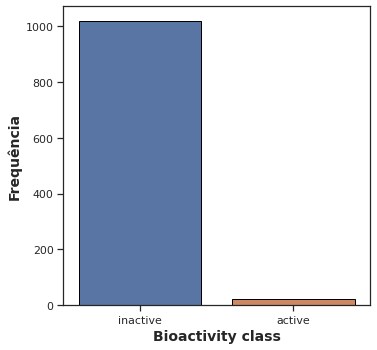

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2classes, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')

Obs: Podemos observar que existe um número muito pequeno que foi classificado como ativo (active).

### Scatter plot: MW vs. LogP

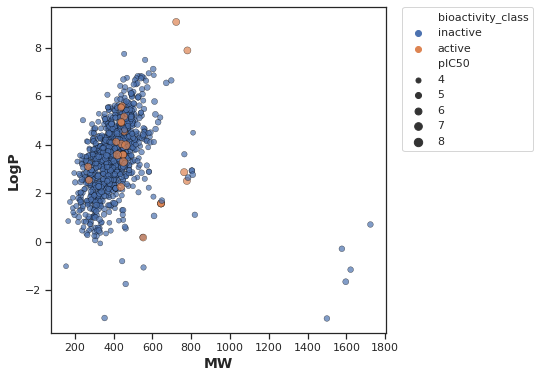

In [37]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Box-plots

pIC50:

Text(0, 0.5, 'pIC50')

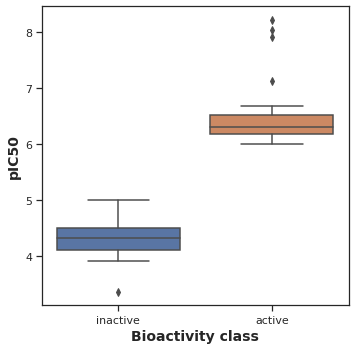

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

### Análise estatística

Mann-Whitney U Test

In [54]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# ativos e inativos
  selection = [descriptor, 'bioactivity_class']
  df = df_2classes[selection]
  ativo = df[df.bioactivity_class == 'active']
  ativo = ativo[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2classes[selection]
  inativo = df[df.bioactivity_class == 'inactive']
  inativo = inativo[descriptor]

# comparar amostras
  stat, p = mannwhitneyu(ativo, inativo)

# conclusao
  alpha = 0.05
  if p > alpha:
    conclusao = 'Mesma distribuição (aceitar H0)'
  else:
    conclusao = 'Distribuições diferentes (rejeitar H0)'
  
  resultado = pd.DataFrame({'Descriptor':descriptor,
                          'Estatística':stat,
                          'p':p,
                          'alpha':alpha,
                          'Conclusão':conclusao}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  resultado.to_csv(filename)

  return resultado

In [55]:
mannwhitney('pIC50')

,Descriptor,Estatística,p,alpha,Conclusão
0,pIC50,24456.0,4.453415e-17,0.05,Distribuições diferentes (rejeitar H0)


**MW**

Text(0, 0.5, 'MW')

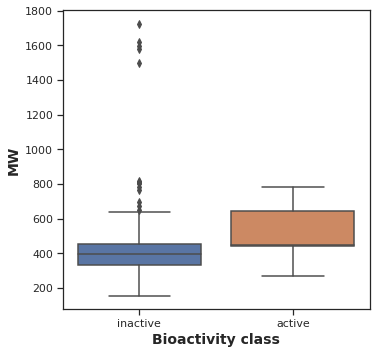

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [56]:
mannwhitney('MW')

,Descriptor,Estatística,p,alpha,Conclusão
0,MW,18007.0,0.000074,0.05,Distribuições diferentes (rejeitar H0)


**LogP**

Text(0, 0.5, 'LogP')

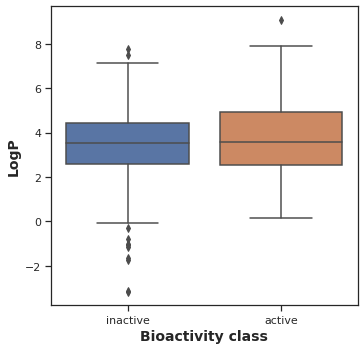

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [57]:
mannwhitney('LogP')

,Descriptor,Estatística,p,alpha,Conclusão
0,LogP,12999.0,0.597342,0.05,Mesma distribuição (aceitar H0)


**NumHDonors**

Text(0, 0.5, 'NumHDonors')

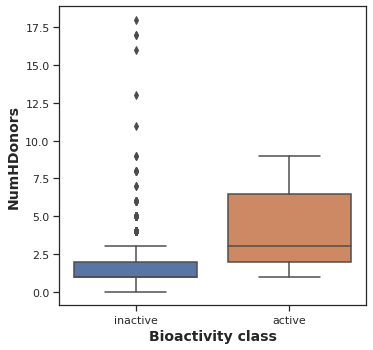

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [58]:
mannwhitney('NumHDonors')

,Descriptor,Estatística,p,alpha,Conclusão
0,NumHDonors,18611.0,0.000006,0.05,Distribuições diferentes (rejeitar H0)


**NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

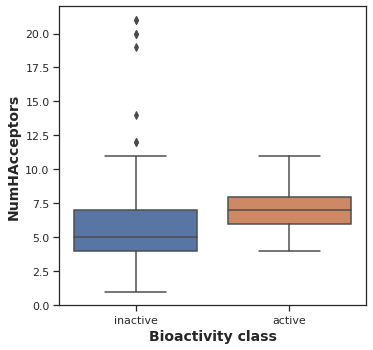

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [59]:
mannwhitney('NumHAcceptors')

,Descriptor,Estatística,p,alpha,Conclusão
0,NumHAcceptors,17396.5,0.000326,0.05,Distribuições diferentes (rejeitar H0)


## Conclusões

**pIC50**

- As duas classes analisadas, ativas e inativas, apresentaram uma diferença estatisticamente significativa, o que era esperado dado que os valores threshold que foram definidos para selecionar cada uma das classes.

**Lipinski's descriptors**

- Levando em consideração a análise dos 4 parâmetros definidos, apenas LogP não apresentou diferença entre as duas classes. 

Obs: Lembrar de salvar os arquivos que foram gerados como resultado das análises estatísticas.